# Could Star Wars planets exist in our universe?

## Part 3. Algorithm and Data Analysis

<img src="https://i.postimg.cc/9XwnRV6Q/Rieekan.webp"><p style='text-align: right'><font size=2>Picture source: https://starwars.fandom.com/wiki/Carlist_Rieekan</font></p>

### Table of contents:
1. Introduction
2. Goal
3. Methodology
4. Similarity Algorithm
5. Data analysis
6. Summary

## 1. Introduction

The path we took was long and bumpy, but at long last we are reaching our destination.

So far we've managed to scrape information from the internet (wiki sites) to create two sets of data - one about Star Wars planets, the other about our exoplanets (**Part 1**). The datasets we've gathered were too heterogeneous and unstructured to compare. This is why we cleared and prepared them first in order to present them in standarized format (**Part 2**).

Now it's time to reach the main goal of this project - to create an algorithm, that will find the most similar exoplanet to chosen Star Wars planet.

## 2. Goal

The goal of this part is to obtain stable, working algorithm that will find the most similar exoplanet.

To achieve that I wil firstly explain my methodology and vision of this algorithm. After that I will write the code, explain how it works and test it on selected planets.

Lastly I will conduct small data analysis based on gathered similarity data.

## 3. Methodology

Before starting this part I thought about what has to be done. The best way to find the most similar planet to chosen one is to compare chosen planet to every other exoplanet first, and describe level of similarity by some value. After consideration I decided to choose one of the most common methodology for comparing two numbers - the one that is both simple and standarized enough (the same value range for every element): **percentage**. If we take minimal value from the set of two numbers to compare, multiply it by 100 and divide by maximum value from the set - we get the percentage value representing their relation. 100% will mean the same value - lesser the value, lesser the similarity between two numbers. Simple and efficient.

The only thing remaining is finding exoplanet with maximum similarity rate to chosen Star Wars planet. There are two catches though:
- what if there are two planets (or more) with exact same, maximum similarity rate value?
- what if we will be comparing Star Wars planet with complete data (both orbital period and diameter values present) to exoplanet with incomplete data (only one of those parameters present)?  

First problem is simple to solve. If there are multiple planets with maximum values we simply need to present them all. 

What about second problem though? My concern is that it's much easier to calculate similarity based on one value. But it doesn't necessarily tell us what we need to know. I assume that exoplanets with incomplete data will tend to have high similarity rates in general. But if there is a **possibility to compare both orbital period and diameter**, I want the algorithm to list **the most similar exoplanet with complete data** as well.

This is why next to array with similarity rates I will create an array containing similarity rates with exoplanets filtered to only those exoplanets with complete set of data. Based on those two sets I will be able to create desired algorithm.

After algorithm is complete and tested I will create **Closest Planets** table containing data about all Star Wars planets, the most similar exoplanets to them and their similarity rates. However, knowing that comparing incomplete data does not give us 100% precise information, I will make second table (**Complete Data Planets**) containing only those planets (both Star Wars and exoplanets) with **complete set of data** (obrital period value and diameter value) and their similarity rates. This table will be definitely smaller, but the information contained in it will be much more accurate and reliable. Based on those two data sets I will conduct small data analysis of chosen aspects.

To sum this all up those are my steps I will follow in next chapters:

- Creating similarity rate tables:
  - calculate similarity rate with all exoplanets (rows) for all Star wars planets (columns)
    - similarity rate will be described as percentage value and calculated by following formula:  
  (min value)*100/(max value) [%]
    - if planet has only orbital period data, only this value will be compared with exoplanet (if present)
    - if planet has only diameter data, only this value will be compared with exoplanet (if present)
    - if planet has complete data, either one of them will be compared with exoplanet (depending of presence) or both - then it will be calculated as **mean** similarity percentage.
    - if there is no corresponding data to compare, similarity rate will be 0%
  - create two dataframes (for all exoplanet data and for complete only exoplanet data) based on described scheme


- Creating similarity algorithm:
  - algorithm will find exoplanet with max similarity value for chosen Star Wars planet
  - if multiple planets have max similarity value, all of them will be listed
  - if star wars planet has complete data, and planet with max similarity rate has incomplete data - additional exoplanet (with complete data) will be listed as well
  - the outcome of prepared algorithm will be table containing information about orbital period, diameter and similarity rate for all listed planets
  

- Data analysis
  - create **closest planets** table containing exoplanets with maximal similarity rate (and their similarity rate) for each star wars planet
  - create **complete data planets** table containing exoplanets with maximal similarity rate (and their similarity rate) for each star wars planet - only for planets with complete set of data.
  - create a chart presenting number of representations for different similarity levels
  - create a chart presenting number of exoplanets with similarity rate >90% for each star wars planet
  - create a chart presenting number of representations of each exoplanet
  - create a chart presenting number of representations of each exoplanet for planets with complete data




## 4. Similarity algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We have already prepared and cleaned data from **Part 2** of this project. It will be our basis for calculating similarity rates.

In [2]:
swPlanets = pd.read_csv('./Cleaned_StarWarsPlanets.csv', index_col=0).dropna(axis=0, how='all').fillna('')
exoPlanets = pd.read_csv('./Cleaned_Exoplanets.csv', index_col=0).dropna(axis=0, how='all').fillna('')

Our first step is creating function that will assign similarity rate value for all Star Wars planets and exoplanets. As I described in **Methodology** chapter I will design different possibilities depending on data availability.

In [3]:
def similarity(swp, exp):
    similarRate = {}
    for i in swp.index:
        planetList = []
        sorb = swPlanets.loc[i]['Orbital period [d]']
        sdia = swPlanets.loc[i]['Diameter [km]']
        #for incomplete data - diameter missing
        if sorb!='' and sdia=='':
            for j in exp.index:
                eorb = exoPlanets.loc[j]['Orbital period [d]']
                edia = exoPlanets.loc[j]['Diameter [km]']
                #checking ig it's possible to compare orbital period
                if eorb!='':
                    planetList.append(min(sorb,eorb)*100/max(sorb,eorb))
                else:
                    planetList.append(0)
        #for incomplete data - orbital period missing
        elif sorb=='' and sdia!='':
            for j in exp.index:
                eorb = exoPlanets.loc[j]['Orbital period [d]']
                edia = exoPlanets.loc[j]['Diameter [km]']
                #checking if it's possible to compare diameter
                if edia!='':
                    planetList.append(min(sdia,edia)*100/max(sdia,edia))
                else:
                    planetList.append(0)
        #for complete data
        else:
            for j in exp.index:
                eorb = exoPlanets.loc[j]['Orbital period [d]']
                edia = exoPlanets.loc[j]['Diameter [km]']
                #for incomplete exoplanets data - diameter missing
                if eorb!='' and edia=='':
                    planetList.append(min(sorb,eorb)*100/max(sorb,eorb))
                #for incomplete exoplanets data - orbital period missing
                elif eorb=='' and edia!='':
                    planetList.append(min(sdia,edia)*100/max(sdia,edia))
                #for complete exoplanets data
                else:
                    planetList.append((min(sorb,eorb)*100/max(sorb,eorb)+min(sdia,edia)*100/max(sdia,edia))/2)
        similarRate[i] = planetList
    return similarRate

This function can be probably written down in less than 42 lines (I'm pretty sure actually) but I wanted to make it as clear and transparent as possible. We were able to consider all possible scenarios. Now let's check how it works by creating similarity data table:

In [4]:
#creating array with similarity rates
similarityData = pd.DataFrame(index=exoPlanets.index, data = similarity(swPlanets, exoPlanets))
similarityData.head()

,Abafar,Alderaan,Aleen,Asmeru,Atollon,Auratera,Bardotta,Batuu,Bespin,Cato Neimoidia,...,Taanab,Takodana,Tatooine,Toydaria,Utapau,Vandor,Vlemoth Port,Weik,Xorrn,Yavin Prime
Kepler-42c,0.768488,37.309785,0.113606,0.093192,0.089760,0.161888,0.074554,36.579271,1.618923,0.156522,...,35.606834,38.584259,44.565142,0.246352,36.157129,37.299622,0.177065,0.182777,0.086176,4.655940
55 Cancri e,1.973857,26.232668,0.184598,0.151428,0.145851,0.263053,0.121143,26.755020,2.630628,0.254333,...,27.426899,25.466576,21.998429,0.400297,27.072623,26.216154,0.287714,0.296995,0.140028,11.958750
WASP-19b,16.355000,3.262122,0.197704,0.162179,0.156206,0.281729,0.129743,3.324901,2.818125,0.272390,...,3.369023,3.236296,2.770076,0.428717,3.367056,3.244436,0.308141,0.318081,0.149970,99.087912
WASP-43b,12.272150,4.314740,0.203879,0.167245,0.161085,0.290528,0.133796,4.398494,2.905907,0.280897,...,4.469855,4.257683,3.652546,0.442107,4.453374,4.296502,0.317765,0.328015,0.154654,74.351680
Kepler-10b,1.547504,33.446027,0.209898,0.172182,0.165841,0.299105,0.137746,34.112332,2.991133,0.289190,...,34.974706,32.459162,28.042448,0.455160,34.516880,33.427251,0.327146,0.337700,0.159220,9.375660


Looks good. Every raw represents similarity rate of corresponding column (Star Wars planet) and index (exoplanet). If there is no similarity (data were unable to compare) similarity rate = 0.

As I explained in Methodology chapter, I will also need similarity rate table made only for exoplanets with complete set of data as well. Let's filter exoplanets dataframe and make a second similarity rate table:

In [5]:
#creating array with similarity rates for exoplanets with complete data
co = exoPlanets['Orbital period [d]'] != ''
cd = exoPlanets['Diameter [km]'] != ''
completeExo = exoPlanets[co&cd]
similarityDataComplete = pd.DataFrame(index=completeExo.index, data = similarity(swPlanets, completeExo))
similarityDataComplete.head()

,Abafar,Alderaan,Aleen,Asmeru,Atollon,Auratera,Bardotta,Batuu,Bespin,Cato Neimoidia,...,Taanab,Takodana,Tatooine,Toydaria,Utapau,Vandor,Vlemoth Port,Weik,Xorrn,Yavin Prime
Kepler-42c,0.768488,37.309785,0.113606,0.093192,0.089760,0.161888,0.074554,36.579271,1.618923,0.156522,...,35.606834,38.584259,44.565142,0.246352,36.157129,37.299622,0.177065,0.182777,0.086176,4.655940
55 Cancri e,1.973857,26.232668,0.184598,0.151428,0.145851,0.263053,0.121143,26.755020,2.630628,0.254333,...,27.426899,25.466576,21.998429,0.400297,27.072623,26.216154,0.287714,0.296995,0.140028,11.958750
WASP-19b,16.355000,3.262122,0.197704,0.162179,0.156206,0.281729,0.129743,3.324901,2.818125,0.272390,...,3.369023,3.236296,2.770076,0.428717,3.367056,3.244436,0.308141,0.318081,0.149970,99.087912
WASP-43b,12.272150,4.314740,0.203879,0.167245,0.161085,0.290528,0.133796,4.398494,2.905907,0.280897,...,4.469855,4.257683,3.652546,0.442107,4.453374,4.296502,0.317765,0.328015,0.154654,74.351680
Kepler-10b,1.547504,33.446027,0.209898,0.172182,0.165841,0.299105,0.137746,34.112332,2.991133,0.289190,...,34.974706,32.459162,28.042448,0.455160,34.516880,33.427251,0.327146,0.337700,0.159220,9.375660


Now we are set. The only thing left is writing down our main course, which is similarity algorithm.

With already detailed description of methodology and planned outcome (Methodology chapter), I will just jump into code itself, keeping in mind all of the nuances and steps we need to make and all of the possibilities we need to examin for the function to work properly.

In [6]:
def find_similar(planet):
    sim = similarityData[planet]
    simC = similarityDataComplete[planet]
    sorb = swPlanets.loc[planet]['Orbital period [d]']
    sdia = swPlanets.loc[planet]['Diameter [km]']
    simData = {planet:[sorb,sdia,100.0]}
    notComplete = 0
    exLen = 0
    #loop for multiple max similarity rate values
    for i in sim[sim==sim.max()].index:
        eorb = exoPlanets.loc[i]['Orbital period [d]']
        edia = exoPlanets.loc[i]['Diameter [km]']
        simData[i] = [eorb, edia, round(sim.loc[i],1)]
        #checking if exoplanet data is complete
        if eorb=='' or edia =='':
            notComplete += 1
        exLen += 1
    #finding additional exoplanet with complete data
    if sorb!='' and sdia!='' and notComplete==exLen:
        for i in simC[simC==simC.max()].index:
            eorb = exoPlanets.loc[i]['Orbital period [d]']
            edia = exoPlanets.loc[i]['Diameter [km]']
            simData[i] = [eorb, edia, round(simC.loc[i],1)]
        
    simFrame = pd.DataFrame(index=['Orbital period [d]','Diameter [km]', 'Similarity rate [%]'], data=simData)
    return simFrame.round(1)

Here it is. **The ALGORITHM**.

Does it work though? Let's check some popular planets

In [7]:
find_similar('Tatooine')

,Tatooine,HD 59686 b,Kepler-22b
Orbital period [d],304.0,303.0,289.9
Diameter [km],10465.0,,30614.4
Similarity rate [%],100.0,99.7,64.8


**HD 59686 b** is the most similar planet to Tatooine with 99.7% similarity rate. We can see that orbital period of both of those planets is almost the same. However this planet data is incomplete, so the way I wanted this algorithm to work is to list the most similar planet with complete data. And it worked. If we consider **complete** data, the most similar planet would be Kepler-22b with 64.8% similarity rate.

What about our poor* **Alderaan**?


***SPOILER ALERT** - it was destroyed in Star Wars: A new hope :(

In [8]:
find_similar('Alderaan')

,Alderaan,HD 38283 b,Candidate 1
Orbital period [d],364.0,363.2,360.0
Diameter [km],12500.0,,42094.8
Similarity rate [%],100.0,99.8,64.3


Algorithm works in the same way.

Now Let's check maximum possible similarity rate for both tables:

In [9]:
find_similar(similarityData.max().idxmax())

,Toydaria,41 Lyncis b
Orbital period [d],184.0,184.02
Diameter [km],,
Similarity rate [%],100.0,100.0


Suspiciously similar, wouldnt't you say?

I would keep an eye on this one in case Toydorians find out about us.

In [10]:
find_similar(similarityDataComplete.max().idxmax())

,Yavin Prime,HAT-P-9b
Orbital period [d],,3.9
Diameter [km],200000.0,200177.6
Similarity rate [%],100.0,99.9


99.9% similarity in complete exoplanets data set is a lot. Sadly, we don't have complete data about **Yavin Prime**. Maybe one day.

Anyway - our algorithm works! That's amazing news!

We are ready to jump into data analysis chapter.

## 5. Data analysis

Since we already have some decent data prepared and calculated, we can analyse some aspects of them. In order to do that I will start with creating **Closest Planets** dataframe, which will contain data about Star Wars planets (index), the closest (most similar) planet (for all exoplanets data) and similarity rates for those planets. We will display the outcome sorted by similarity rate.

In [11]:
closestList = []
closestRate = []
for i in similarityData.columns:
    closestList.append(similarityData[i].idxmax())
    closestRate.append(round(similarityData[i].max(),1))
    
closestData = {'Closest planet':closestList, 'Similarity rate [%]':closestRate}
closestPlanets = pd.DataFrame(index=similarityData.columns, data=closestData).sort_values('Similarity rate [%]', ascending=False)
closestPlanets.head()

,Closest planet,Similarity rate [%]
Dagobah,HD 192699 b,100.0
Kashyyyk,HD 20868 b,100.0
Toydaria,41 Lyncis b,100.0
Cato Neimoidia,Kepler-22b,99.9
Hoth,HD 4113 b,99.9


Now we will do the same, but filtering our data to only those planets, which contain information about both **orbital period** and **diameter**, creating **Complete Data Planets** dataframe. We will sort the data by similarity rate as well.

In [12]:
swd = swPlanets['Diameter [km]']!=''
swo = swPlanets['Orbital period [d]']!=''
swComplete = swPlanets[swd&swo]
allComplete = pd.DataFrame(index=completeExo.index, data = similarity(swComplete, completeExo))
completeList = []
completeRate = []

for i in allComplete.columns:
    completeList.append(allComplete[i].idxmax())
    completeRate.append(round(allComplete[i].max(),1))
    
completeData = {'Closest planet':completeList, 'Similarity rate [%]':completeRate}
completeDataPlanets = pd.DataFrame(index=allComplete.columns, data=completeData).sort_values('Similarity rate [%]', ascending=False)
completeDataPlanets.head()

,Closest planet,Similarity rate [%]
Takodana,Kepler-1544 b,65.9
Tatooine,Kepler-22b,64.8
Batuu,Candidate 1,64.5
Alderaan,Candidate 1,64.3
Utapau,Candidate 1,64.1


As expected, similarity rates are noticeably lower. This information is much more valuable though.

Let's make some charts now. I want to see **how many similar planets we have for different similarity level**.

Are most of them very similar? Or just few?

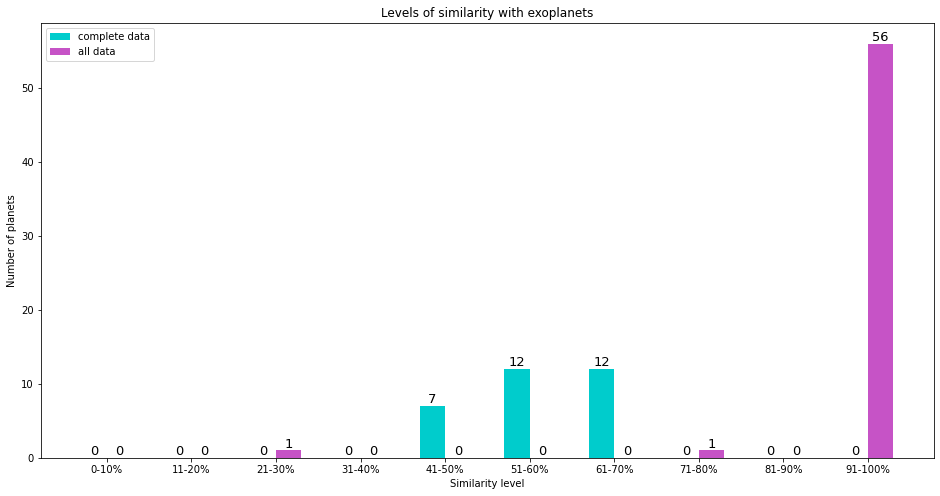

In [13]:
#rounding the data because we will operate with round ranges in chart
ccf = round(completeDataPlanets['Similarity rate [%]'])
icf = round(closestPlanets['Similarity rate [%]'])
#creating range values (from - to)
fromVal = [0,11,21,31,41,51,61,71,81,91]
toVal = [10,20,30,40,50,60,70,80,90,100]
complete = []
incomplete = []

#calculating the number of values that fit between certain ranges
for i,j in zip(fromVal,toVal): 
    complete.append(len(ccf[ccf.between(i,j)]))
    incomplete.append(len(icf[icf.between(i,j)]))
    
labels = [str(i)+'-'+str(j)+'%' for i,j in zip(fromVal,toVal)]
w = .3
x = np.arange(len(labels))

plt.figure(figsize=(16,8))
plt.bar(x-w/2, complete, w, label='complete data', color='#00cccc')
plt.bar(x+w/2, incomplete, w, label='all data', color='#c653c6')
plt.legend(loc='upper left')
plt.xticks(x,labels)
plt.ylabel('Number of planets')
plt.xlabel('Similarity level')
plt.title('Levels of similarity with exoplanets')
for i in range(len(labels)):
    plt.text(i-w/2, complete[i],complete[i],ha='center',va='bottom',size=13)
    plt.text(i+w/2, incomplete[i],incomplete[i],ha='center',va='bottom',size=13)
plt.show()

As we can see, similarity rate **tend to be high if we consider all available data** (it's easier to find a "match" where the is only one data to compare). This is actually what we expected, but it's interesting nontheless.

If we consider only planets with complete set of data, situation is different. Similarity levels are within 41-70% range, although most of them (24 out of 32) exceedes 50% threshold.

Since similarity rate in all data set is exceptionaly high, I wonder **how many planets with rally high similarity (>90%) each Star Wars planet have**. It's fairly easy to check, so let's do it:

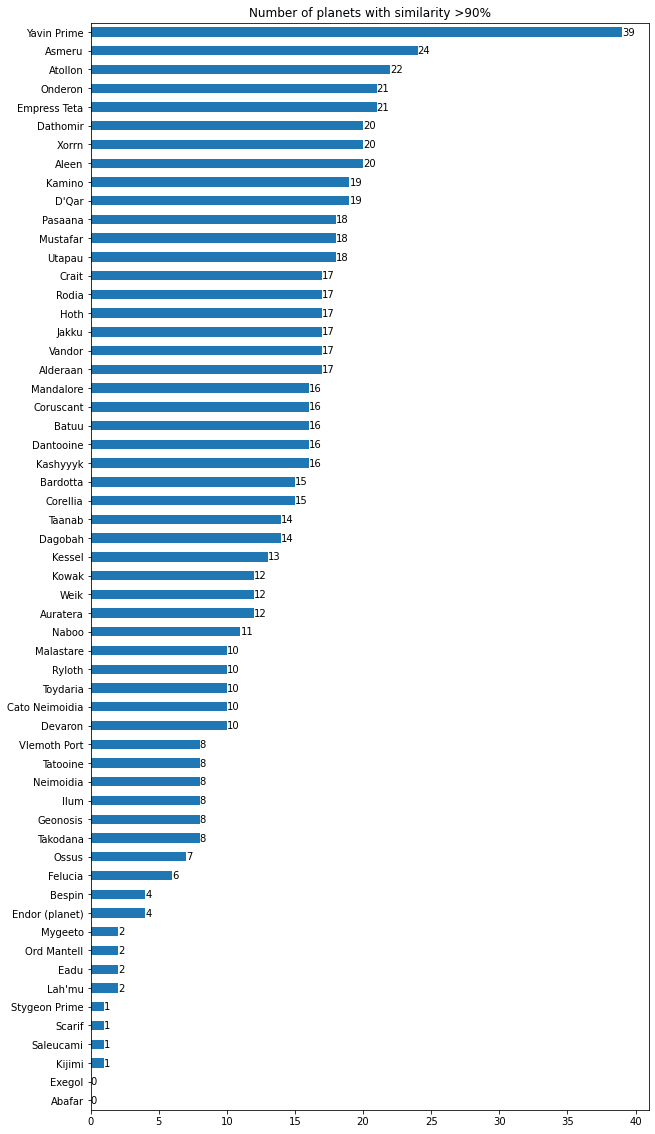

In [14]:
highSimilarityList = []

#calculating number of similarity rates higher than 90 for each Star Wars planet
for i in similarityData.columns:
    pdata = similarityData[i]
    highSimilarityList.append(len(pdata[pdata>90.0]))
    
highSimilarity = pd.DataFrame(index=similarityData.columns, columns=['similarity >90%'], data=highSimilarityList)
highSimilarity.sort_values(['similarity >90%'], inplace=True)
ax = highSimilarity.plot.barh(figsize=(10,20), legend=False)
ax.set_title('Number of planets with similarity >90%')
for i in range(len(highSimilarity.index)):
    ax.text(highSimilarity['similarity >90%'][i], i, highSimilarity['similarity >90%'][i], va='center')
plt.show()

Oh hello **Yavin Prime**, there are **39 planets** that could be you.  
Or maybe just your data is somehow universal. Let's check the details again:

In [15]:
find_similar('Yavin Prime')

,Yavin Prime,HAT-P-9b
Orbital period [d],,3.9
Diameter [km],200000.0,200177.6
Similarity rate [%],100.0,99.9


Yavin Prime has only one value that describes it - **diameter**. There are apparently many exoplanets with **similar size**, which is interesting. The most similar one is **HAT-P-9b** with 99.9% similarity rate.

The other thing that I noticed is that some of the exoplanets appear more than once in our list of the most similar ones. **How many unique values of each exoplanet do we have** in our Closet Planets and All Data Planets tables?

In [16]:
iswp = len(closestPlanets.index)
swp = len(completeDataPlanets.index)
icd = len(closestPlanets['Closest planet'].unique())
cd = len(completeDataPlanets['Closest planet'].unique())
print('''Star Wars planets: {}
Similar exoplanets: {}
Star Wars planets (complete data): {}
Similar exoplanets (complete data): {}'''.format(iswp,icd,swp,cd))

Star Wars planets: 58
Similar exoplanets: 39
Star Wars planets (complete data): 31
Similar exoplanets (complete data): 8


Exactly. We have 58 Star Wars planets but only 39 exoplanets in Closest planets table.  
Even less unique exoplanets (8) for each Star Wars planet (31) in All Data Planets table.  
Which planets are **the most popular** then?

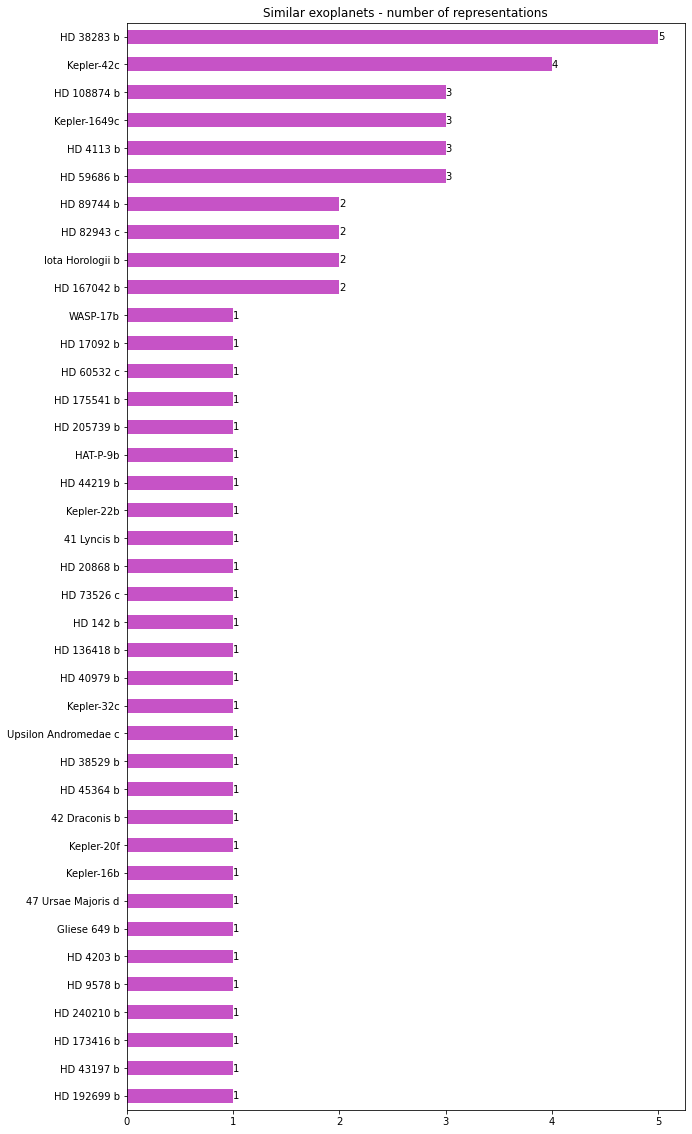

In [17]:
closestValues = closestPlanets['Closest planet'].value_counts(ascending=True)
ax = closestValues.plot(kind='barh', figsize=(10,20), color='#c653c6')
ax.set_title('Similar exoplanets - number of representations')
for i in range(len(closestValues.index)):
    ax.text(closestValues[i], i, closestValues[i], va='center')
plt.show()

Datails about **HD 38283 b** representation:

In [18]:
closestPlanets[closestPlanets['Closest planet']=='HD 38283 b'].sort_values(['Similarity rate [%]'], ascending=False)

,Closest planet,Similarity rate [%]
Alderaan,HD 38283 b,99.8
Batuu,HD 38283 b,99.5
Coruscant,HD 38283 b,99.5
Mandalore,HD 38283 b,99.2
Rodia,HD 38283 b,98.6


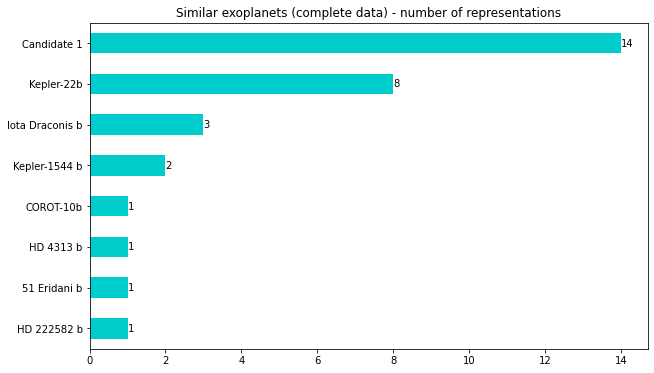

In [19]:
closestValuesComplete = completeDataPlanets['Closest planet'].value_counts(ascending=True)
ax = closestValuesComplete.plot(kind='barh', figsize=(10,6), color='#00cccc')
ax.set_title('Similar exoplanets (complete data) - number of representations')
for i in range(len(closestValuesComplete.index)):
    ax.text(closestValuesComplete[i], i, closestValuesComplete[i], va='center')
plt.show()

Datails about **Candidate 1** representation:

In [20]:
completeDataPlanets[completeDataPlanets['Closest planet']=='Candidate 1'].sort_values(['Similarity rate [%]'], ascending=False)

,Closest planet,Similarity rate [%]
Batuu,Candidate 1,64.5
Alderaan,Candidate 1,64.3
Utapau,Candidate 1,64.1
Coruscant,Candidate 1,63.9
Kashyyyk,Candidate 1,62.4
Pasaana,Candidate 1,60.8
Mandalore,Candidate 1,60.1
Rodia,Candidate 1,57.8
Dantooine,Candidate 1,57.4
Vandor,Candidate 1,56.2


Here we have it. The most popular exoplanet from all exoplanet data is **HD 38283 b** (most similar planet for 5 Star Wars planets) and **Candidate 1** for planets with complete set of data (astounding result of 14 representations as most similar planet).

## 6. Summary

We did it. We finally managed to create algorithm calculating similarities between Star Wars planets and real life exoplanets, bringing us a step closer to answering the question:

**Could Star Wars planets exist in our universe?**

Who knows. Sky is the limit to our imagination. Or rather galaxy, especially this far, far away...

The short analysis I conducted showed us that there are many similarities and many exoplanets that have some (or all) properies that are really close to those from planets existing in Star Wars universe. The planets worth mentioning are **Toydaria** (100% similarity to **41 Lyncis b**) and **Yavin Prime** (99.9% similarity to **HAT-P-9b** and 39 planets with similarity >90%).

However we have to keep in mind, that the high similarity rates values are caused by lack of data. After analysing set of planets with complete data, the highest similarity rate turned out to be **65.9%** (Takodana to Kepler-1544 b similarity). The more data we have, the more accurate comparision we can make. Based on available information though, presented charts and tables are the most accurate outcome we can have at that moment.

Thank you for your time and attention, I hope you enjoyed this analysis as much as I did.

I hope I'll see you again in the ones yet to come!